<a href="https://colab.research.google.com/github/kojiyam/denso/blob/master/denso07_1_Monte_Carlo_simulation_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 円周率 $ \pi $ のモンテカルロ法による評価

In [1]:
# 一般的なライブラリ・モジュール
import numpy as np
np.random.seed(seed=1) # 擬似乱数のseed．研究では，再現性のため，擬似乱数のseedは固定すべき
import matplotlib.pyplot as plt
import time

In [27]:
# パラメータ
# サンプル数 M=10^8 だとNの計算に22sかかる 10^4, 10^6くらいが無難
M = np.int(1e4)
M_fig = 200 # 画像出力の際の点の数

In [29]:
# numpy.random.rand(M) 一様分布[0,1)に従う乱数M個
x = np.random.rand(M)
y = np.random.rand(M)

$X, Y$ は，互いに独立な一様分布[0,1)に従う確率変数

$ (x_i, y_i), i=0,\dots,M-1 $ は$(X,Y)$の実現値（数学では$i=1,\dots,M$と書くのが普通だが，Pythonに合わせた）

$ \text{x[i]}=x_i$

$ \text{y[i]}=y_i$

上記の設定の元で次式が成り立つ

$\displaystyle \mathbb{P} (X^2+Y^2 \leq 1) = \frac{\pi}{4}$

この左辺をモンテカルロ法で評価

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


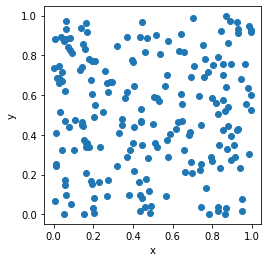

In [30]:
# 200点のみ図示
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal',adjustable='box')
plt.scatter(x[0:M_fig], y[0:M_fig])

In [36]:
start = time.time() # 時間表示
tdata = ( x**2 + y**2 <= 1 ).astype(np.int)
N = sum( tdata )
elapsed_time = time.time() - start # 時間表示
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]") # 時間表示

elapsed_time:0.004477262496948242[sec]


$ \text{tdata[i]} := \mathbf{1}( {x_i}^2 + {y_i}^2 \leq 1 ) $

$ \displaystyle N := \sum_{i=1}^M \mathbf{1}({x_i}^2 + {y_i}^2 \leq 1 )$

In [37]:
# 図示のための準備

ndata0 = np.where( tdata==0 )
ndata1 = np.where( tdata==1 )

$ \text{ndata0} = \{i:{x_i}^2+{y_i}^2 \not\leq 1\} = \{ i: \mathbf{1}({x_i}^2+{y_i}^2 \leq 1) = 0 \}$

$ \text{ndata1} = \{i:{x_i}^2+{y_i}^2 \leq 1\} = \{ i: \mathbf{1}({x_i}^2+{y_i}^2 \leq 1) = 1 \}$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


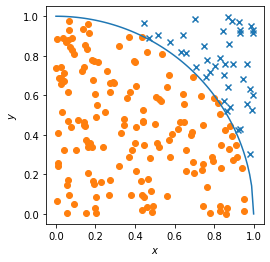

In [38]:
ndata0_fig = np.where(tdata[0:200]==0)
ndata1_fig = np.where(tdata[0:200]==1)
xtics = np.linspace(0,1,100)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axes().set_aspect('equal',adjustable='box')

plt.plot(xtics,np.sqrt(1-xtics**2))
plt.scatter(x[ndata0_fig], y[ndata0_fig], marker="x")
plt.scatter(x[ndata1_fig], y[ndata1_fig] )

In [39]:
print(4*N/M)

3.1476


$ \displaystyle \lim_{M \to \infty} \frac{N}{M} = \mathbb{P}(X^2+Y^2 \leq 1) = \frac{\pi}{4}$

[参考文献]

【Python】処理にかかる時間を計測して表示 https://qiita.com/fantm21/items/3dc7fbf4e935311488bc